<a href="https://colab.research.google.com/github/churroxd8/nlp-notebooks/blob/main/Preprocesamiento_de_Rese%C3%B1as_de_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Procesamiento de Lenguaje Natural - Reseñas de Amazon
## Luis Mario Sainz Peñuñuri y Manuel Alejandro Heredia Nogales
### Objetivo
Realizar un análisis de reseñas de productos de Amazon para **identificar los aspectos más relevantes** mencionados por los usuarios. Este análisis integra técnicas de preprocesamiento utilizadas en el Procesamiento de Lenguaje Natural.

### Técnicas Implementadas
- **Expresiones regulares**: Limpieza y normalización de texto
- **Tokenización**: Segmentación de texto en unidades significativas
- **Normalización**: Estandarización de texto
- **Stopwords**: Eliminación de palabras sin valor semántico
- **Lematización**: Reducción de palabras a su forma base
- **POS Tagging**: Etiquetado gramatical de palabras
- **NER**: Reconocimiento de entidades nombradas
- **Pattern Matching**: Identificación de patrones contextuales

## Dataset
- **Fuente**: Amazon Reviews Dataset
- **Contenido**: Reseñas de productos con ratings, títulos y texto completo

## Instalación y Configuración de Librerías
En esta sección instalamos todas las librerías necesarias para el preprocesamiento de PLN:
- **pandas/numpy**: Manipulación de datos
- **matplotlib/seabron**: Visualización
- **wordcloud**: Nubes de palabras
- **nltk**: Herramientas de PLN (tokenización, POS tagging, lematización)
- **spacy**: PLN avanzado y NER

`!pip install -q pandas numpy matplotlib seaborn wordcloud nltk spacy`

### Descarga de Recursos de NLTK:
Descargamos los siguientes recursos de NLTK:
- `punk_tab`: Tokenización de oraciones y palabras
- `stopwords`: Lista de palabras comunes sin valor semántico
- `averaged_perceptron_tagger_eng`: Etiquetador gramatical (POS tagger)
- `maxent_ne_chunker`: Reconocimiento de entidades nombradas
- `wordnet`: Base de datos léxica para lematización
- `omw-1.4`: Open Multilingual Wordnet

### Descarga del Modelo de spaCy
Instalamos el modelo del inglés de spaCy `en_core_web_sm` que incluye:
- Tokenizador optimizado
- POS tagger
- Reconocimiento de entidades nombradas (NER)
- Dependencias sintácticas

In [1]:
# =======================================================================
# 1. INSTALACIÓN Y CONFIGURACIÓN DE LIBRERÍAS
# =======================================================================

# Instalamos librerías necesarias
!pip install -q pandas numpy matplotlib seaborn wordcloud nltk spacy

# Descargamos recursos de NLTK
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Descargamos modelo de spaCy para inglés
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 74.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importación de Librerías
Importamos todas las librerías que utilizaremos en el análisis y preprocesamiento

### Manipulación de Datos
- `pandas`: DataFrames y manipulación de datos tabulares
- `numpy`: Operaciones numéricas

### Procesamiento de Lenguaje Natural
- `nltk`: Tokenización, stopwords, lematización, POS tagging
- `spacy`: PLN avanzado y NER

### Visualizaciones
- `matplotlib`: Gráficos básicos
- `seaborn`: Visualizaciones estadísticas
- `wordcloud`: Nube de palabras

### Utilidades
- `re`: Expresiones regulares
- `Counter`: Conteo eficiente de elementos

In [2]:
# =========================================================================
# 2. IMPORTACIÓN DE LIBRERÍAS
# =========================================================================
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

# Librerías de PLN
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import spacy

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Configuración de estilos de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## Carga y Exploración de Datos

### Descripción del Proceso
1. **Carga del Dataset** desde Google Drive
2. **Exploración de dimensiones**: número de filas y columnas
3. **Identificación de columnas**: especialmente aquellas con texto de reseñas
4. **Vista Previa**: primeras filas del dataset


In [3]:
# =========================================================================
# 3. CARGADO Y EXPLORACIÓN DE DATOS
# =========================================================================
print("="*80)
print("CARGANDO EL DATASET DE RESEÑAS DE AMAZON")
print("="*80)

# Cargamos el dataset
df = pd.read_csv('/content/drive/MyDrive/amazon_reviews.csv', low_memory=False)

print(f"\nDimensiones del dataset: {df.shape}")
print(f"    - Filas: {df.shape[0]:,}")
print(f"    - Columnas: {df.shape[1]}")

print("\nPrimeras columnas del dataset:")
print(df.columns.tolist()[:10])

print("\nPrimeras filas:")
print(df.head(3))

CARGANDO EL DATASET DE RESEÑAS DE AMAZON

Dimensiones del dataset: (1597, 27)
    - Filas: 1,597
    - Columnas: 27

Primeras columnas del dataset:
['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated', 'dimension', 'ean', 'keys']

Primeras filas:
                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  .

## Identificación de Columnas de Texto

### Objetivo
Identificar qué columnas contienen texto relevante para el análisis:
- **reviews.text**: Texto completo de la reseña (columna principal)
- **reviews.title**: Título de la reseña
- **reviews.rating**: Calificación numérica del producto

### Métricas Analizadas
Para cada columna de texto calculamos:
- **Valores no nulos**: ¿Cuántas reseñas tiene el contenido?
- **Longitud promedio**: ¿Qué tan extensas son las reseñas?

In [4]:
# ==========================================================================
# 4. IDENTIFICACIÓN DE COLUMNAS DE TEXTO RELEVANTE
# ==========================================================================
print("\n" + "="*80)
print("IDENTIFICANDO COLUMNAS DE TEXTO PARA ANÁLISIS")
print("="*80)

# Identificamos columnas con texto de reseñas
text_columns = [col for col in df.columns if 'review' in col.lower() or 'text' in col.lower() or 'title' in col.lower()]
print(f"\nColumnas de texto identificadas: {text_columns}")

# Verificamos cuál columna tiene más información
for col in text_columns:
  if col in df.columns:
    non_null_count = df[col].notna().sum()
    avg_length = df[col].dropna().astype(str).str.len().mean()
    print(f"\n    - {col}:")
    print(f"      - Valores no nulos: {non_null_count:,} ({non_null_count/len(df)*100:.1f}%)")
    print(f"      - Longitud promedio: {avg_length:.1f} caracteres")

# Usamos la columna 'reviews.text' como principal
TEXT_COL = 'reviews.text'
TITLE_COL = 'reviews.title' if 'reviews.title' in df.columns else None
RATING_COL = 'reviews.rating' if 'reviews.rating' in df.columns else None


IDENTIFICANDO COLUMNAS DE TEXTO PARA ANÁLISIS

Columnas de texto identificadas: ['reviews.date', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username']

    - reviews.date:
      - Valores no nulos: 1,217 (76.2%)
      - Longitud promedio: 22.8 caracteres

    - reviews.doRecommend:
      - Valores no nulos: 539 (33.8%)
      - Longitud promedio: 4.1 caracteres

    - reviews.numHelpful:
      - Valores no nulos: 900 (56.4%)
      - Longitud promedio: 3.5 caracteres

    - reviews.rating:
      - Valores no nulos: 1,177 (73.7%)
      - Longitud promedio: 3.0 caracteres

    - reviews.sourceURLs:
      - Valores no nulos: 1,597 (100.0%)
      - Longitud promedio: 479.0 caracteres

    - reviews.text:
      - Valores no nulos: 1,597 (100.0%)
      - Longitud promedio: 909.3 caracteres

    - reviews.title:
      - Valores no nulos: 1,580 (98.9%)
      - Longitud

## Análisis de Calidad de Datos

### Problemas Comunes en Datos de Texto

Antes de procesar el texto, identificamos problemas de calidad:
1. **Textos vacíos o nulos**: Reseñas sin contenido
2. **Duplicados**: Reseñas repetidas que pueden sesgar el análisis
3. **Caracteres especiales**: Símbolos, emojis, o caracteres no-ASCII problemáticos
4. **URLs**: Enlaces que no aportan valor semántico

### Metodología
Utilizamos expresiones regulares para detectar cada tipo de problema y reportar estadísticas.

In [5]:
# ===========================================================================
# 5. LIMPIEZA INICIAL Y DETECCIÓN DE PROBLEMAS
# ===========================================================================
print("\n" + "="*80)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("="*80)

# Creamos un DataFrame para trabajar
df_clean = df.copy()

# 5.1 Textos vacíos o nulos
print(f"\nTextos vacíos/nulos:")
null_count = df_clean[TEXT_COL].isna().sum()
empty_count = (df_clean[TEXT_COL].fillna('').str.strip() == '').sum()
print(f"    - Valores nulos: {null_count:,}")
print(f"    - Textos vacíos: {empty_count:,}")

# 5.2 Duplicados
print(f"\nTextos duplicados:")
duplicates = df_clean[TEXT_COL].duplicated().sum()
print(f"    - Reseñas duplicadas: {duplicates:,}")

# 5.3 Caracteres extraños
print(f"\nDetectando caracteres especiales problemáticos...")
def detect_special_chars(text):
  if pd.isna(text):
    return False
  # Buscamos caracteres no ASCII comunes problemáticos
  pattern = r'[^\x00-\x7F]+'
  return bool(re.search(pattern, str(text)))

special_char_count = df_clean[TEXT_COL].apply(detect_special_chars).sum()
print(f"    - Textos con caracteres especiales: {special_char_count:,}")

# 5.4 URLs en el texto
print(f"\nDetectando URLs...")
def contains_url(text):
  if pd.isna(text):
    return False
  pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
  return bool(re.search(pattern, str(text)))

url_count = df_clean[TEXT_COL].apply(contains_url).sum()
print(f"  - Textos con URLs: {url_count:,}")


ANÁLISIS DE CALIDAD DE DATOS

Textos vacíos/nulos:
    - Valores nulos: 0
    - Textos vacíos: 0

Textos duplicados:
    - Reseñas duplicadas: 549

Detectando caracteres especiales problemáticos...
    - Textos con caracteres especiales: 2

Detectando URLs...
  - Textos con URLs: 18


## Limpieza de Texto con Expresiones Regulares

### Proceso de Limpieza

Aplicamos una serie de transformaciones usando **expresiones regulares** (regex):
| Paso | Acción | Expresión Regular | Propósito |
|------|--------|-------------------|-----------|
| 1 | Remover URLs | `http[s]?://...` | Eliminar enlaces web |
| 2 | Remover emails | `\S+@\S+` | Eliminar direcciones de correo |
| 3 | Remover HTML tags | `<[^>]+>` | Eliminar etiquetas HTML |
| 4 | Separar palabras pegadas | `([a-zA-Z])\.([a-zA-Z])` | Separar "word.another" → "word . another" |
| 5 | Normalizar espacios | `\s+` | Convertir múltiples espacios en uno |
| 6 | Remover caracteres especiales | `[^\w\s\.\,\!\?\-\']` | Mantener solo alfanuméricos y puntuación básica |
| 7 | Normalizar puntuación | `\s+([.,!?])` | Eliminar espacios antes de puntuación |
| 8 | Remover números standalone | `\b\d+\b` | Eliminar números aislados (mantener "3G", "2nd") |
| 9 | Convertir a minúsculas | `.lower()` | Normalización de texto |
| 10 | Trim espacios | `.strip()` | Eliminar espacios al inicio/final |

### Importante

La función `clean_text()` es crítica porque:
- Mejora la calidad de la tokenización
- Previene errores como "word.another" siendo un solo token
- Normaliza el texto para análisis consistente


In [6]:
# ===========================================================================
# 6. LIMPIEZA DE TEXTO CON EXPRESIONES REGULARES
# ===========================================================================
print("\n" + "="*80)
print("LIMPIEZA DE TEXTO CON EXPRESIONES REGULARES")
print("="*80)

def clean_text(text):
  """
  Limpia el texto usando expresiones regulares
  """
  if pd.isna(text):
    return ""

  text = str(text)

  # 1. Elimina URLs
  text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

  # 2. Elimina emails
  text = re.sub(r'\S+@\S+', '', text)

  # 3. Elimina HTML tags
  text = re.sub(r'<[^>]+>', '', text)

  # 4. Separa palabras pegadas a puntuación (ej: "voyage.fortunately" -> "voyage . fortunately")
  text = re.sub(r'([a-zA-Z])\.([a-zA-Z])', r'\1 . \2', text)
  text = re.sub(r'([a-zA-Z]),([a-zA-Z])', r'\1 , \2', text)
  text = re.sub(r'([a-zA-Z])!([a-zA-Z])', r'\1 ! \2', text)
  text = re.sub(r'([a-zA-Z])\?([a-zA-Z])', r'\1 ? \2', text)

  # 5. Normaliza espacios en blanco múltiples
  text = re.sub(r'\s+', ' ', text)

  # 6. Elimina caracteres especiales pero mantener puntuación básica y apóstrofes
  text = re.sub(r'[^\w\s\.\,\!\?\-\']', ' ', text)

  # 7. Normaliza espacios alrededor de puntuación
  text = re.sub(r'\s+([.,!?])', r'\1', text)

  # 8. Elimina números standalone (pero mantener palabras como "2nd", "3G")
  text = re.sub(r'\b\d+\b', '', text)

  # 9. Convierte a minúsculas
  text = text.lower()

  # 10. Trim espacios al inicio y final
  text = text.strip()

  return text

# Aplica una limpieza
print("\nAplicando limpieza de texto...")
df_clean['text_cleaned'] = df_clean[TEXT_COL].apply(clean_text)

# Elimina textos vacíos después de limpieza
initial_count = len(df_clean)
df_clean = df_clean[df_clean['text_cleaned'].str.len() > 10]
removed_count = initial_count - len(df_clean)
print(f"    Textos removidos por ser muy cortos: {removed_count:,}")
print(f"    Textos restantes para análisis: {len(df_clean):,}")

# Muestra ejemplos de limpieza
print("\nEjemplos de limpieza:")
for i in range(min(3, len(df_clean))):
  original = str(df_clean[TEXT_COL].iloc[i])[:150]
  cleaned = df_clean['text_cleaned'].iloc[i][:150]
  print(f"\n  Original: {original}...")
  print(f"\n  Limpio: {cleaned}...")


LIMPIEZA DE TEXTO CON EXPRESIONES REGULARES

Aplicando limpieza de texto...
    Textos removidos por ser muy cortos: 10
    Textos restantes para análisis: 1,587

Ejemplos de limpieza:

  Original: I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but ...

  Limpio: i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing  the paperwhite is great, but ...

  Original: Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series,...

  Limpio: allow me to preface this with a little history. i am  was  a casual reader who owned a nook simple touch from . i've read the harry potter series, gir...

  Original: I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Have

## Tokenización

### ¿Qué es la Tokenización?

La **tokenización** es el proceso de dividir el texto en unidades más pequeñas llamadas **tokens** (generalmente palabras).

**Ejemplo**:
```
Texto: "I love this Kindle!"
Tokens: ["I", "love", "this", "kindle", "!"]
```

### Método Utilizado

Utilizamos `word_tokenize()` de NLTK que:
- Divide el texto en palabras
- Maneja correctamente la puntuación
- Reconoce contracciones (aunque se filtran posteriormente)
- Es más robusto que solo usar `.split()`

### Métricas Calculadas

- **Promedio de tokens por reseña**
- **Mediana de tokens**
- **Mínimo y máximo de tokens**

In [7]:
# ===========================================================================
# 7. TOKENIZACIÓN
# ===========================================================================
print("\n" + "="*80)
print("TOKENIZACIÓN")
print("="*80)

def tokenize_text(text):
  """
  Tokenizar texto en palabras
  """
  try:
    return word_tokenize(text)
  except:
    return text.split()

print("\nTokenizando textos...")
df_clean['tokens'] = df_clean['text_cleaned'].apply(tokenize_text)

# Estadísticas de tokenización
token_count = df_clean['tokens'].apply(len)
print(f"\nEstadísticas de tokenización:")
print(f"      - Promedio de tokens por reseña: {token_count.mean():.1f}")
print(f"      - Mediana de tokens: {token_count.median():.1f}")
print(f"      - Mínimo de tokens: {token_count.min()}")
print(f"      - Máximo de tokens: {token_count.max()}")

# Ejemplo de tokenización
print(f"\nEjemplo de tokenización:")
sample_idx = 0
print(f"    Texto: {df_clean['text_cleaned'].iloc[sample_idx][:100]}...")
print(f"    Tokens: {df_clean['tokens'].iloc[sample_idx][:20]}")


TOKENIZACIÓN

Tokenizando textos...

Estadísticas de tokenización:
      - Promedio de tokens por reseña: 188.3
      - Mediana de tokens: 96.0
      - Mínimo de tokens: 2
      - Máximo de tokens: 3938

Ejemplo de tokenización:
    Texto: i initially had trouble deciding between the paperwhite and the voyage because reviews more or less ...
    Tokens: ['i', 'initially', 'had', 'trouble', 'deciding', 'between', 'the', 'paperwhite', 'and', 'the', 'voyage', 'because', 'reviews', 'more', 'or', 'less', 'said', 'the', 'same', 'thing']


## Normalización y Eliminación de Stopwords

### ¿Qué son las Stopwords?

Las **stopwords** son palabras muy comunes que aportan poco valor semántico:
- Artículos: "the", "a", "an"
- Preposición: "in", "on", "at", "to"
- Pronombres: "I", "you", "he", "she"
- Conjunciones: "and", "but", "or"
- Auxiliares: "is", "are", "was", "were"

### Mejoras Implementadas

Además de las stopwords estándar de NLTK, filtramos:

1. **Contracciones del inglés**: `n't`, `'re`, `'ve`, `'ll`, `'d`, `'m`, `'s`
2. **Fragmentos sin significado**: `hdx`, `nt`, `ve`, `re`
3. **Palabras muy cortas**: Tokens de ≤ 2 caracteres
4. **Tokens con apóstrofes**: Para eliminar contracciones residuales
5. **Tokens no alfabéticos**: Son palabras con letras

### Impacto Esperado

La eliminación de stopwords típicamente reduce el vocabulario en un 40-60%, dejando solo palabras con contenido semántico relevante.

In [8]:
# =============================================================================
# 8. NORMALIZACIÓN Y STOPWORDS
# =============================================================================
print("\n" + "="*80)
print("NORMALIZACIÓN Y ELIMINACIÓN DE STOPWORDS")
print("="*80)

# Obtiene stopwords en inglés
stop_words = set(stopwords.words('english'))

# Añade contracciones comunes del inglés y tokens no válidos
contractions_and_invalid = {
    # Contracciones
    "n't", "'re", "'ve", "'ll", "'d", "'m", "'s",
    "n't", "'re", "'ve", "'ll", "'d", "'m", "'s",
    # Fragmentos comunes que no son palabras
    "nt", "ve", "re", "ll", "im", "id",
    # Palabras muy cortas sin significado
    "hdx", "ive", "dont", "didnt", "cant", "wont", "wouldnt", "couldnt", "shouldnt",
    # Otros fragmentos comunes
    "thats", "whats", "heres", "theres", "youre", "theyre", "were",
}

stop_words.update(contractions_and_invalid)

print(f"\nStopwords en inglés: {len(stop_words)} palabras")
print(f"      Ejemplos: {list(stopwords.words('english'))[:20]}")

def remove_stopwords(tokens):
  """
  Remover stopwords de la lista de tokens
  """
  cleaned_tokens = []
  for token in tokens:
    # Verifica que el token:
    # 1. No esté en stopwrods
    # 2. Tenga más de 2 caracteres (elimina "n't", "'s", etc.)
    # 3. Sea alfabético (no números ni símbolos puros)
    # 4. No contenga apóstrofes (elimina contracciones residuales)
    if (token.lower() not in stop_words and len(token) > 2 and token.isalpha() and "'" not in token):
      cleaned_tokens.append(token)
  return cleaned_tokens

print("\nRemoviendo stopwords...")
df_clean['tokens_no_stop'] = df_clean['tokens'].apply(remove_stopwords)

# Compara antes y después
tokens_before = df_clean['tokens'].apply(len).sum()
tokens_after = df_clean['tokens_no_stop'].apply(len).sum()
reduction = (1 - tokens_after/tokens_before) * 100

print(f"\nImpacto de stopwords:")
print(f"      - Tokens antes: {tokens_before:,}")
print(f"      - Tokens después: {tokens_after:,}")
print(f"      - Reduccion: {reduction:.1f}%")


NORMALIZACIÓN Y ELIMINACIÓN DE STOPWORDS

Stopwords en inglés: 223 palabras
      Ejemplos: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']

Removiendo stopwords...

Impacto de stopwords:
      - Tokens antes: 298,860
      - Tokens después: 126,155
      - Reduccion: 57.8%


## Lematización

### ¿Qué es la Lematización?

La **lematización** reduce las palabras a su forma base o **lema** (forma en la que aparecería en un diccionario).

**Ejemplos**:
- "running", "runs", "ran" → "run"
- "better", "best", → "good"
- "was", "were", "been" → "be"
- "books" → "book"

### Lematización vs Stemming

| Característica | Lematización | Stemming |
|---------------|--------------|----------|
| **Método** | Análisis morfológico + diccionario | Reglas heurísticas |
| **Resultado** | Palabra válida (lema) | Raíz (puede no ser palabra) |
| **Ejemplo** | "studies" → "study" | "studies" → "studi" |
| **Precisión** | Alta | Media |
| **Velocidad** | Más lento | Más rápido |

### Herramienta Utilizada

Usamos `WordNetLemmatizer` de NLTK que utiliza la base de datos léxica **WordNet** para realizar una lematización precisa

### Beneficios

- Reduce la dimensionalidad del vocabulario
- Agrupa variaciones de la misma palabra
- Mejora el análisis de frecuencias
- Facilita la identificación de aspectos

In [9]:
# =============================================================================
# 9. LEMATIZACIÓN
# =============================================================================
print("\n" + "="*80)
print("LEMATIZACIÓN")
print("="*80)

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  """
  Lematiza tokens
  """
  return [lemmatizer.lemmatize(token) for token in tokens]

print("\nAplicando lematización...")
df_clean['tokens_lemmatized'] = df_clean['tokens_no_stop'].apply(lemmatize_tokens)

# Ejemplos de lematización
print("\nEjemplos de lematización:")
sample_tokens = df_clean['tokens_no_stop'].iloc[0][:10]
sample_lemmas = df_clean['tokens_lemmatized'].iloc[0][:10]
for token, lemma in zip(sample_tokens, sample_lemmas):
  if token != lemma:
    print(f"    {token:15s} → {lemma}")


LEMATIZACIÓN

Aplicando lematización...

Ejemplos de lematización:
    reviews         → review


## POS Tagging (Etiquetado Gramatical)

### ¿Qué es POS Tagging?

**POS** (Part-Of-Speech) Tagging asigna a cada palabra su categoría gramatical:

| Tag | Categoría | Ejemplos |
|-----|-----------|----------|
| NN | Sustantivo singular | "book", "screen", "battery" |
| NNS | Sustantivo plural | "books", "screens", "batteries" |
| NNP | Nombre propio singular | "Kindle", "Amazon" |
| NNPS | Nombre propio plural | "Americans" |
| VB | Verbo base | "read", "buy" |
| VBD | Verbo pasado | "read", "bought" |
| VBG | Verbo gerundio | "reading", "buying" |
| JJ | Adjetivo | "good", "great", "amazing" |
| RB | Adverbio | "very", "really", "quickly" |

### ¿Para qué sirve?

1. **Extracción de sustantivos**: Identificar productos y aspectos
2. **Extracción de adjetivos**: Capturar opiniones y sentimientos
3. **Análisis sintáctico**: Entender la estructura de las oraciones
4. **Desambiguación**: "book" puede ser sustantivo (libro) o verbo (reservar)

### Configuración

- Aplicamos POS tagging a una **muestra de 1000 reseñas** por eficiencia
- Usamos `averaged_perceptron_tagger_eng` de NLTK
- Precisión aproximada: ~97% en inglés

### Análisis Realizado

Calculamos la distribución de categorías gramaticales para entender la composición de textos.

In [10]:
# =========================================================================
# 10 POS TAGGING (Part-of-Speech Tagging)
# =========================================================================
print("\n" + "="*80)
print("POS TAGGING (Etiquetado Gramatical)")
print("="*80)

def pos_tag_tokens(tokens):
  """
  Etiquetar gramaticalmente los tokens
  """
  return pos_tag(tokens)

print("\nAplicando POS tagging a muestra de reseñas...")
# Aplica solo a primeras 1000 reseñas por eficiencia
sample_size = min(1000, len(df_clean))
df_clean['pos_tags'] = None
df_clean.loc[:sample_size-1, 'pos_tags'] = df_clean.loc[:sample_size-1, 'tokens_no_stop'].apply(pos_tag_tokens)

# Analiza distribución de POS tags
print("\nDistribución de categorías gramaticales:")
all_pos_tags = []
for tags in df_clean['pos_tags'].dropna():
  all_pos_tags.extend([tag for word, tag in tags])

pos_counter = Counter(all_pos_tags)
print("\n     Top 15 categorías gramaticales:")
for pos, count in pos_counter.most_common(15):
  print(f"    - {pos:10s}: {count:6,} ({count/len(all_pos_tags)*100:5.2f}%)")

# Ejemplo de POS tagging
print("\nEjemplo de POS tagging:")
if df_clean['pos_tags'].iloc[0] is not None:
  sample_pos = df_clean['pos_tags'].iloc[0][:15]
  for word, tag in sample_pos:
    print(f"  {word:15s} → {tag}")


POS TAGGING (Etiquetado Gramatical)

Aplicando POS tagging a muestra de reseñas...

Distribución de categorías gramaticales:

     Top 15 categorías gramaticales:
    - NN        : 32,657 (33.78%)
    - JJ        : 20,305 (21.00%)
    - NNS       :  9,290 ( 9.61%)
    - RB        :  7,325 ( 7.58%)
    - VBP       :  5,298 ( 5.48%)
    - VBG       :  4,347 ( 4.50%)
    - VBD       :  3,593 ( 3.72%)
    - VB        :  2,820 ( 2.92%)
    - IN        :  2,437 ( 2.52%)
    - VBN       :  2,102 ( 2.17%)
    - VBZ       :  2,095 ( 2.17%)
    - CD        :    978 ( 1.01%)
    - MD        :    974 ( 1.01%)
    - JJR       :    728 ( 0.75%)
    - RBR       :    516 ( 0.53%)

Ejemplo de POS tagging:
  initially       → RB
  trouble         → NN
  deciding        → VBG
  paperwhite      → JJ
  voyage          → NN
  reviews         → VBZ
  less            → JJR
  said            → VBD
  thing           → NN
  paperwhite      → NN
  great           → JJ
  spending        → NN
  money           → N

## Análisis Exploratorio Básico

### Distribución de Longitudes de Reseñas

Analizamos:
- **Longitud de caracteres**: Para entender que tan extensas son las reseñas
- **Longitud en palabras**: Para un análisis semántico

**Importancia**:
- Reseñas muy cortas que pueden tener poco contenido útil
- Reseñas muy largas que pueden ser detallas y valiosas
- Mediante la distribución, nos ayudará a identificar los outliers

### Visualizaciones Generadas

1. **Histograma de longitud en caracteres**
  - Muestra la distribución de tamaños de reseñas
  - La línea roja indica la media

2. **Histograma de conteo de palabras**
  - Es más entendible que los caracteres
  - Útil para entender el nivel de detalle


ANÁLISIS EXPLORATORIO DE DATOS

Distribución de longitudes de reseñas:
    Estadísticas de longitud (caracteres):
count     1587.000000
mean       910.683050
std       1291.860565
min         11.000000
25%        154.000000
50%        463.000000
75%       1661.000000
max      19683.000000
Name: review_length, dtype: float64

  Estadísticas de conteo de palabras:
count    1587.000000
mean       79.492754
std       112.882827
min         1.000000
25%        14.000000
50%        42.000000
75%       144.000000
max      1771.000000
Name: word_count, dtype: float64


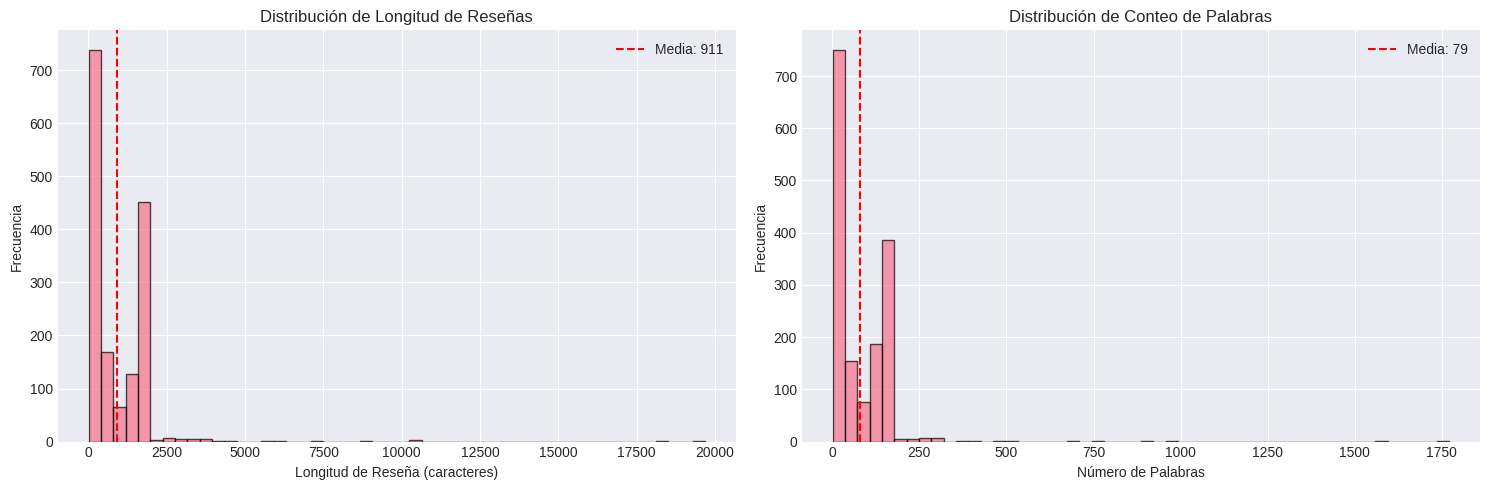


✓ Gráfico guardado: distribucion_longitudes.png


In [11]:
# ============================================================================
# 11. ANÁLISIS EXPLORATORIO BÁSICO
# ============================================================================
print("\n" + "="*80)
print("ANÁLISIS EXPLORATORIO DE DATOS")
print("="*80)

# 11.1 Distribución de longitudes de reseñas
print("\nDistribución de longitudes de reseñas:")

df_clean['review_length'] = df_clean['text_cleaned'].str.len()
df_clean['word_count'] = df_clean['tokens_lemmatized'].apply(len)

print(f"    Estadísticas de longitud (caracteres):")
print(df_clean['review_length'].describe())

print(f"\n  Estadísticas de conteo de palabras:")
print(df_clean['word_count'].describe())

# Visualización: Distribución de longitudes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de longitudes en caracteres
axes[0].hist(df_clean['review_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Longitud de Reseña (caracteres)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Longitud de Reseñas')
axes[0].axvline(df_clean['review_length'].mean(), color='red', linestyle='--',
                label=f'Media: {df_clean["review_length"].mean():.0f}')
axes[0].legend()

# Histograma de conteo de palabras
axes[1].hist(df_clean['word_count'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Número de Palabras')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Conteo de Palabras')
axes[1].axvline(df_clean['word_count'].mean(), color='red', linestyle='--',
                label=f'Media: {df_clean["word_count"].mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/distribucion_longitudes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: distribucion_longitudes.png")

## Palabras Más Frecuentes

### Análisis de Frecuencias

Contamos con la aparición de cada palabra **lematizada** después de:
1. Tokenización
2. Eliminación de stopwords
3. Lematización
4. Filtración de tokens inválidos

### Fitros Aplicados

Para garantizar la calidad del vocabulario, solo contamos palabras que:

- Sean alfabéticas (`.isalpha()`)
- Tengan más de 2 caracteres
- No contenga apóstrofes (elimina contracciones)
- No estén en la lista de tokens inválidos

Rechazamos: `n't`, `'re`, `'ve`, `hdx`, etc.

### Métricas Reportadas

- **Total de palabras útiles (filtradas)**: Tamaño del vocabulario limpio
- **Total de palabras (filtradas)**: Corpus completo sin ruido
- **Palabras removidas** Contracciones y tokens inválidos eliminados

### Visualización

- Gráfico de barras horizontal con top 20 palabras
- Ordenadas por frecuencia descendente

### Interpretación

Las palabras más frecuentes revelan:
- Temas principales de las reseñas
- Productos o características más mencionados
- Vocabulario típico de los usuarios


ANÁLISIS DE PALABRAS MÁS FRECUENTES

Total de palabras únicas (filtradas): 5,240
   Total de palabras (filtradas): 125,917
   Palabras removidas por filtros: 238

Top 30 palabras más frecuentes:
     1. kindle              :  1,514 veces
     2. amazon              :  1,505 veces
     3. fire                :  1,382 veces
     4. like                :  1,253 veces
     5. device              :    987 veces
     6. one                 :    983 veces
     7. use                 :    948 veces
     8. tablet              :    914 veces
     9. sound               :    902 veces
    10. headphone           :    841 veces
    11. review              :    829 veces
    12. read                :    828 veces
    13. great               :    809 veces
    14. would               :    750 veces
    15. prime               :    749 veces
    16. year                :    726 veces
    17. screen              :    674 veces
    18. apple               :    651 veces
    19. well                : 

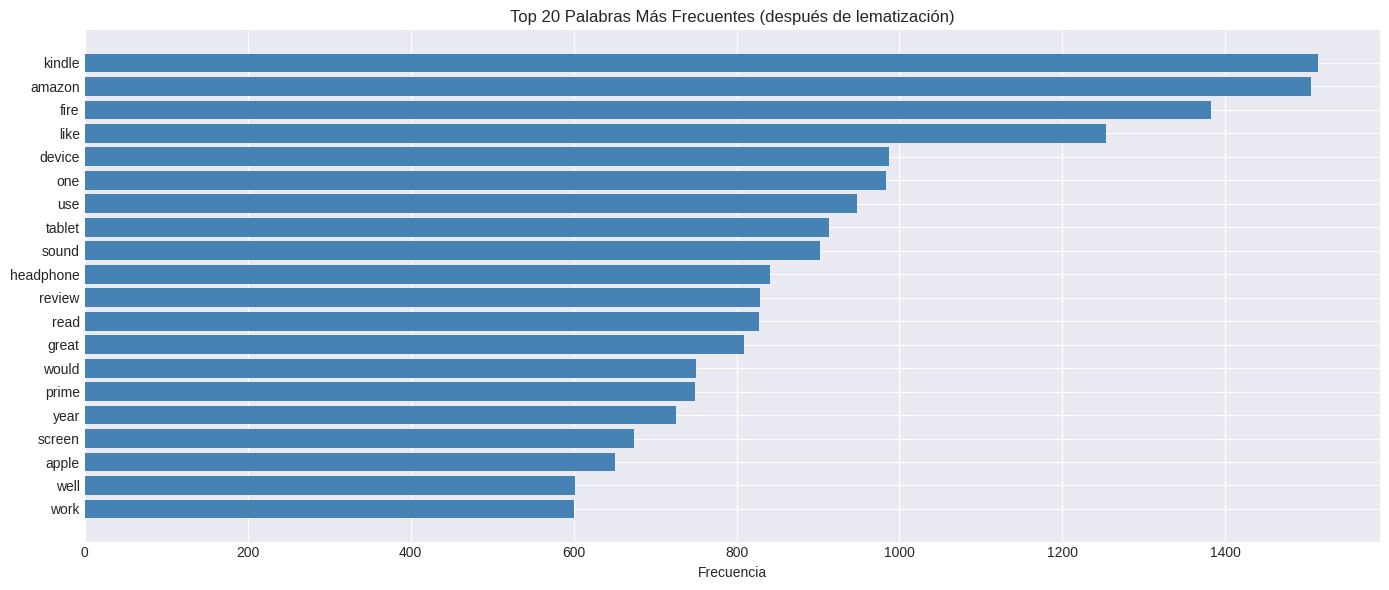


Gráfico guardado: palabras_mas_frecuentes.png


In [12]:
# ===========================================================================
# 12. PALABRAS MÁS FRECUENTES
# ===========================================================================
print("\n" + "="*80)
print("ANÁLISIS DE PALABRAS MÁS FRECUENTES")
print("="*80)

# Cuenta todas las palabras lematizadas
all_words = []
for tokens in df_clean['tokens_lemmatized']:
  all_words.extend(tokens)

# Filtramos palabras para el análisis de frecuencia
# Eliminamos tokens que no sean palabras válidas
def is_valid_word(word):
  """
  Verifica si una palabra es válida para el análisis
  """
  # Debe de ser alfabética, más de 2 caracteres y no contener apóstrofes
  return (word.isalpha() and len(word) > 2 and "'" not in word and word not in contractions_and_invalid)

all_words_filtered = [word for word in all_words if is_valid_word(word)]

word_freq = Counter(all_words_filtered)
print(f"\nTotal de palabras únicas (filtradas): {len(word_freq):,}")
print(f"   Total de palabras (filtradas): {len(all_words_filtered):,}")
print(f"   Palabras removidas por filtros: {len(all_words) - len(all_words_filtered):,}")

print("\nTop 30 palabras más frecuentes:")
top_words = word_freq.most_common(30)
for i, (word, count) in enumerate(top_words, 1):
  print(f"    {i:2d}. {word:20s}: {count:6,} veces")

# Visualización: Palabras más frecuentes
words, counts = zip(*word_freq.most_common(20))
plt.figure(figsize=(14, 6))
plt.barh(range(len(words)), counts, color='steelblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frecuencia')
plt.title('Top 20 Palabras Más Frecuentes (después de lematización)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/palabras_mas_frecuentes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico guardado: palabras_mas_frecuentes.png")

## Extracción y Análisis de Sustantivos

### ¿Por qué solo sustantivos?

Los **sustantivos** son especialmente valiosos porque representan:
- **Productos**: "kindle", "paperwhite", "tablet"
- **Componentes**: "screen", "battery", "display"
- **Aspectos**: "price", "quality", "delivery"
- **Características**: "size", "weight", "resolution"

### Tags de Sustantivos Extraídos

Filtramos solo tokens con estas categorías POS:
- **NN**: Sustantivo singular común
- **NNS**: Sustantivo plural común
- **NNP**: Nombre propio singular
- **NNPS**: Nombre propio plural

### Proceso de Extracción

1. Aplicar POS tagging a los tokens
2. Filtrar solo sustantivos
3. Convertir a minúsculas para normalización
4. Aplicar filtros de validación (alfabéticos, > 2 caracteres)
5. Contar frecuencias

### Análisis Generado

- **Top 50 sustantivos más frecuentes**
- **Gráfico de barras** con top 25

### Utilidad

Los sustantivos frecuentes ayudarían posteriormente a:
- Aspectos de producto a analizar
- Features a monitorear
- Temas para análisis de sentimientos


EXTRACCIÓN Y ANÁLISIS DE SUSTANTIVOS

Extrayendo sustantivos de las reseñas...

Total de sustantivos únicos (filtrados): 2,953
    Total de sustantivos (filtrados): 42,068
    Sustantivos removidos por filtros: 0

Top 50 sustantivos más frecuentes:
   1. fire                     :  1,162 veces
   2. tablet                   :    653 veces
   3. amazon                   :    596 veces
   4. device                   :    594 veces
   5. year                     :    453 veces
   6. kindle                   :    434 veces
   7. review                   :    426 veces
   8. use                      :    405 veces
   9. movies                   :    369 veces
  10. content                  :    357 veces
  11. features                 :    350 veces
  12. quality                  :    347 veces
  13. screen                   :    341 veces
  14. time                     :    330 veces
  15. books                    :    323 veces
  16. apple                    :    294 veces
  17. things  

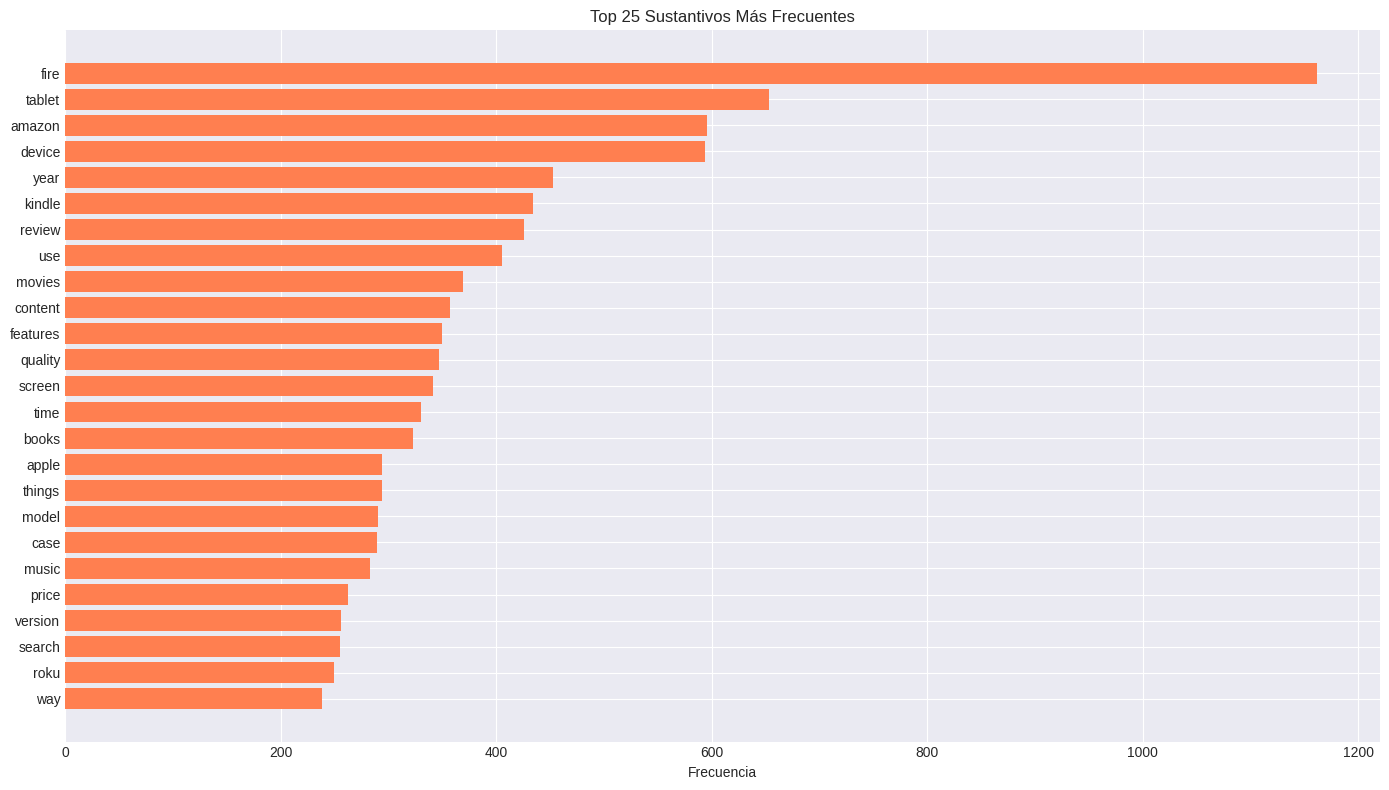


Gráfico guardado: sustantivos_mas_frecuentes.png


In [13]:
# =============================================================================
# 13. EXTRACCIÓN DE SUSTANTIVOS
# =============================================================================
print("\n" + "="*80)
print("EXTRACCIÓN Y ANÁLISIS DE SUSTANTIVOS")
print("="*80)

def extract_nouns(pos_tags):
  """
  Extrae solo sustantivos de los POS tags
  """
  if pos_tags is None:
    return []
  # NN = Noun singular, NNS = Noun plural, NNP = Proper noun singular
  # NNPS = Proper noun plural
  return [word.lower() for word, tag in pos_tags if tag in ['NN', 'NNS', 'NNP', 'NNPS']]

print("\nExtrayendo sustantivos de las reseñas...")
df_clean['nouns'] = df_clean['pos_tags'].apply(extract_nouns)

# Cuenta todos los sustantivos
all_nouns = []
for nouns in df_clean['nouns'].dropna():
  all_nouns.extend(nouns)

# Filtra sustantivos válidos
all_nouns_filtered = [noun for noun in all_nouns if is_valid_word(noun)]

noun_freq = Counter(all_nouns_filtered)
print(f"\nTotal de sustantivos únicos (filtrados): {len(noun_freq):,}")
print(f"    Total de sustantivos (filtrados): {len(all_nouns_filtered):,}")
print(f"    Sustantivos removidos por filtros: {len(all_nouns) - len(all_nouns_filtered):,}")

print("\nTop 50 sustantivos más frecuentes:")
top_nouns = noun_freq.most_common(50)
for i, (noun, count) in enumerate(top_nouns, 1):
  print(f"  {i:2d}. {noun:25s}: {count:6,} veces")

# Visualización: Sustantivos más frecuentes
nouns_list, counts_list = zip(*noun_freq.most_common(25))
plt.figure(figsize=(14, 8))
plt.barh(range(len(nouns_list)), counts_list, color='coral')
plt.yticks(range(len(nouns_list)), nouns_list)
plt.xlabel('Frecuencia')
plt.title('Top 25 Sustantivos Más Frecuentes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/sustantivos_mas_frecuentes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGráfico guardado: sustantivos_mas_frecuentes.png")

## Nube de Palabras de Sustantivos

### ¿En qué consiste un WordCloud?

Una **nube de palabras** es una representación visual donde:
- El **tamaño** de la palabra es proporcional a su frecuencia
- Los **colores** hacen la visualización más atractiva
- Es intuitiva y fácil de interpretar

### Configuración
```python
WordCloud(
  width=1600,              # Alta resolución
  height=800,              # Formato panorámico
  background_color='white',
  colormap='viridis',      # Paleta de colores
  max_words='100',         # Top 100 sustantivos
  relative_scaling=0.5     # Balance entre frecuencia y espacio
)
```

### Intepretación

- **Palabras grandes**: Sustantivos más mencionados
- **Agrupación visual**: Temas relacionados suelen aparecer juntos
- **Primera impresión**: Permite identificar rápidamente los temas principales


GENERANDO NUBE DE PALABRAS DE SUSTANTIVOS


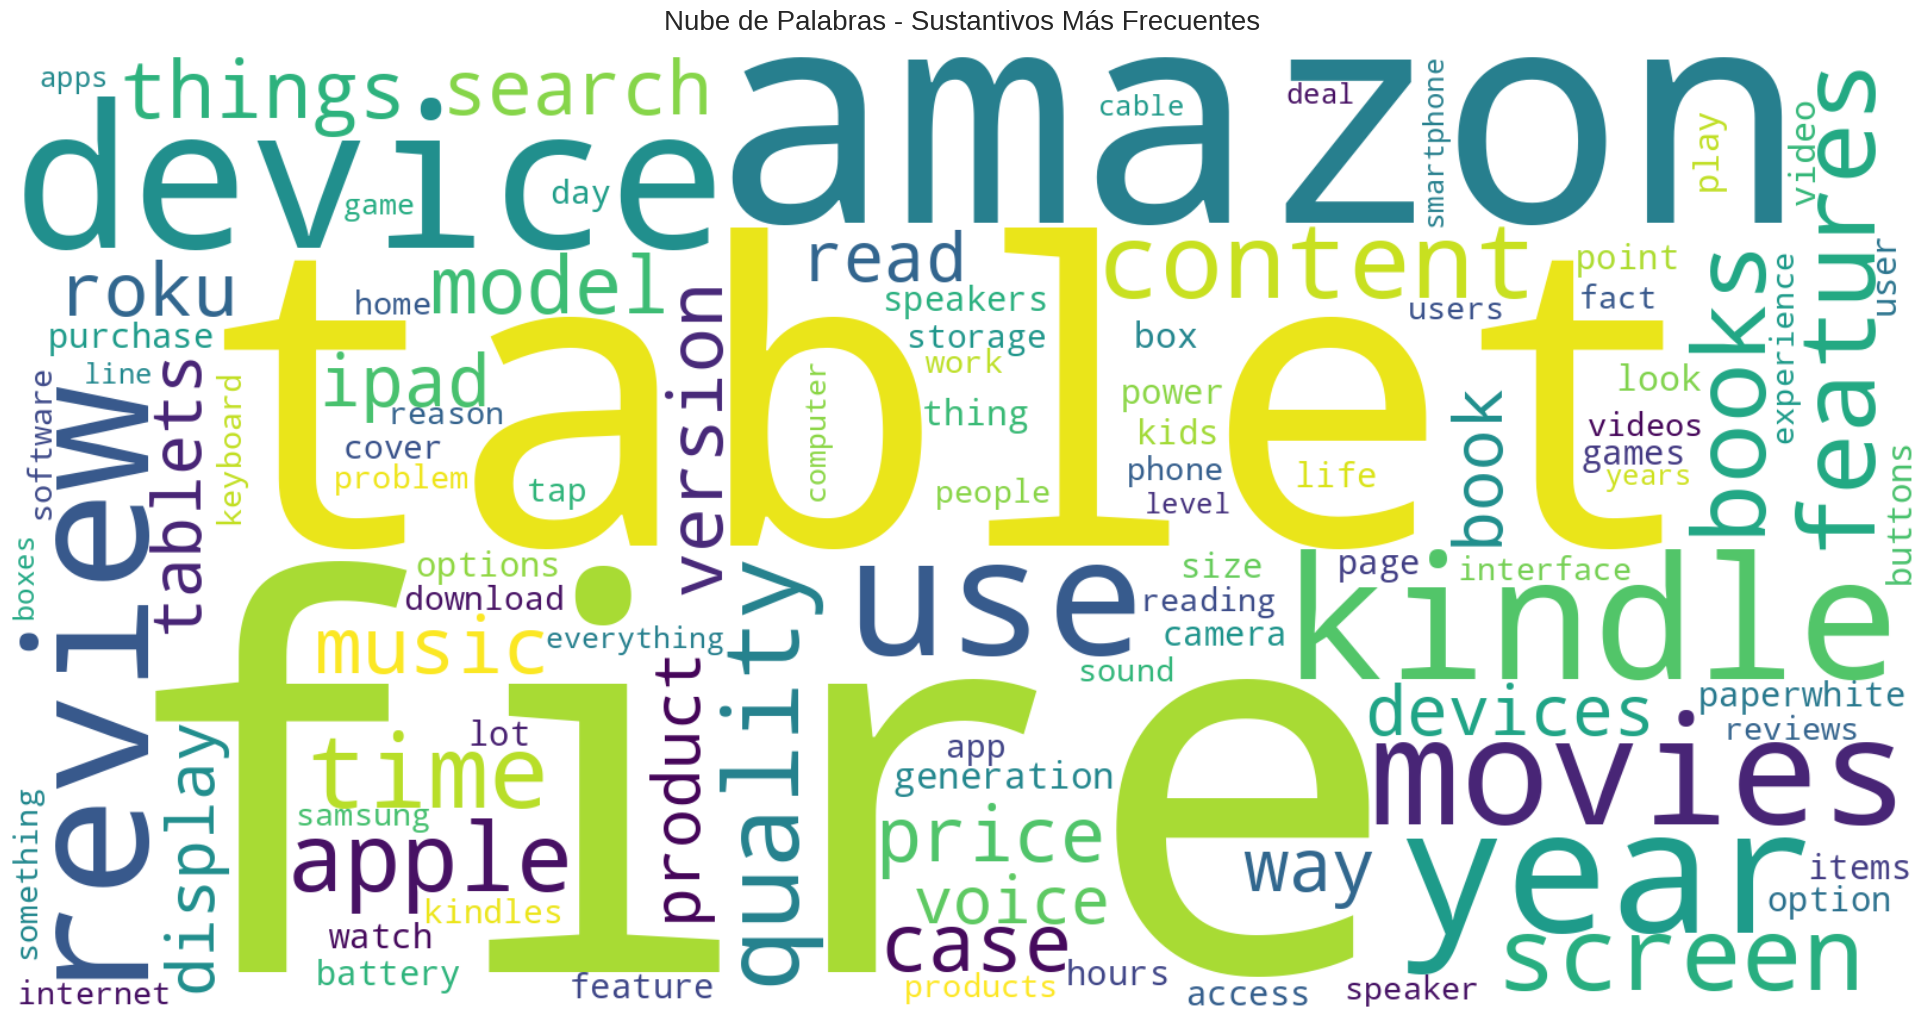


Nube de palabras guardada: wordcloud_sustantivos.png


In [14]:
# =============================================================================
# 14. NUBE DE PALABRAS DE SUSTANTIVOS
# =============================================================================
print("\n" + "="*80)
print("GENERANDO NUBE DE PALABRAS DE SUSTANTIVOS")
print("="*80)

# Crea la nube de palabras
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate_from_frequencies(noun_freq)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Sustantivos Más Frecuentes', fontsize=20, pad=20)
plt.tight_layout(pad=0)
plt.savefig('/content/drive/MyDrive/wordcloud_sustantivos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nNube de palabras guardada: wordcloud_sustantivos.png")

## Identificación de Aspectos de Productos

### Objetivo

Identificar **20-30 aspectos** clave que los usuarios mencionan al evaluar productos.

### Metodología Multi-criterio

Combinamos múltiples enfoques:

#### 1. **Análisis de Frecuencias**

- Top sustantivos más mencionados
- Umbral mínimo: > 10 menciones

#### 2. **Filtrado de Calidad**

```python
Longitud > 3 caracteres
No genérico (evitar "thing", "one", "use")
No números
Alfanumérico
```

#### 3. **Aspectos Predefinidos (Domain Knowledge)**

Utilizamos conocimiento del dominio de productos electrónicos:

**Hardware/Device:**
- kindle, paperwhite, device, tablet, phone, reader

**Pantalla:**
- screen, display, backlight, resolution, brightness, glare

**Batería:**
- battery, charge, power, charger

**Contenido:**
- book, ebook, page, text, font, reading

**Performance:**
- speed, memory, storage, processor

**Servicio:**
- price, quality, delivery, service, shipping

#### 4. **Análisis de Co-ocurrencias**
- Palabras que aparecen frecuentemente cerca de aspectos candidatos
- Ayuda a validar la relevancia contextual

### Resultado

Lista de aspectos categorizados por tipo de característica.

In [15]:
# =============================================================================
# 15. IDENTIFICACIÓN DE ASPECTOS DE PRODUCTOS
# =============================================================================
print("\n" + "="*80)
print("IDENTIFICACIÓN DE ASPECTOS DE PRODUCTOS")
print("="*80)

# Cargamos el modelo de spaCy para NER mejorado
print("\nCargando modelo spaCy...")
nlp = spacy.load('en_core_web_sm')

# Categorías de aspectos que queremos identificar
print("\nIdentificando aspectos relevantes de productos...")

# Lista de aspectos potenciales basados en sustantivos frecuentes y conocimiento
# del dominio
product_aspects_candidates = set()

# Añadimos top sustantivos que no sean stopwords genéricas
generic_words = {'thing', 'one', 'use', 'time', 'way', 'lot', 'bit', 'something', 'anything',
                 'everything', 'someone', 'anyone', 'everyone', 'somewhere', 'anywhere',
                 'everywhere', 'day', 'year', 'week', 'month', 'people', 'person'}

# Filtramos sustantivos relevantes
for noun, freq in noun_freq.most_common(200):
  if (freq > 10 and # Frecuencia mínima
      len(noun) > 3 and # Longitud mínima
      noun not in generic_words and # No genérico
      not noun.isdigit()): # No números
      product_aspects_candidates.add(noun)

# Categorías de aspectos comunes en productos electrónicos y libros
# (si observamos, parece que este es un dataset de reseñas de las e-readers Kindle)
predefined_aspects = {
    # Hardware/Device
    'screen', 'display', 'battery', 'device', 'kindle', 'paperwhite', 'reader',
    'tablet', 'phone', 'computer', 'laptop', 'ipad', 'nook', 'voyage', 'fire',

    # Screen/Display features
    'resolution', 'backlight', 'light', 'brightness', 'glare', 'pixel', 'ppi',

    # Battery
    'charge', 'charger', 'power',

    # Physical features
    'size', 'weight', 'cover', 'case', 'button', 'touchscreen', 'touch',

    # Content
    'book', 'ebook', 'novel', 'page', 'text', 'font', 'library', 'content',
    'story', 'chapter', 'read', 'reading', 'reader',

    # Performance
    'speed', 'performance', 'memory', 'storage', 'processor',

    # Connectivity
    'wifi', 'wireless', 'internet', 'connection', 'network',

    # Service/Experience
    'price', 'value', 'quality', 'experience', 'service', 'delivery', 'shipping',
    'customer', 'support', 'warranty',

    # Software/Interface
    'software', 'app', 'application', 'interface', 'feature', 'function',
    'setting', 'option', 'menu',

    # Comparison
    'version', 'model', 'generation', 'upgrade',
}

# Combinamos aspectos predefinidos con candidatos
product_aspects_candidates.update(predefined_aspects)

# Análisis de concurrencia para identificar aspectos importantes
print("\nAnalizando contexto de aspectos potenciales...")

def analyze_aspect_context(aspect, texts, window=5):
  """
  Analiza palabras que aparecen frecuentemente cerca de un aspecto
  """
  context_words = []
  pattern = re.compile(r'\b' + re.escape(aspect) + r'\b', re.IGNORECASE)

  for text in texts[:500]: # Analiza muestra
    tokens = text.split()
    for i, token in enumerate(tokens):
      if pattern.match(token):
        # Obtiene ventana de contexto
        start = max(0, i - window)
        end = min(len(tokens), i + window + 1)
        context = tokens[start:i] + tokens[i+1:end]
        context_words.extend(context)

  return Counter(context_words)

# Calcula importancia de aspectos basado en frecuencia y contexto
aspect_scores = {}
for aspect in product_aspects_candidates:
  freq = noun_freq.get(aspect, 0)
  if freq > 5: # Mínimo 5 menciones
    aspect_scores[aspect] = freq

# Ordenamos por frecuencia
sorted_aspects = sorted(aspect_scores.items(), key=lambda x: x[1], reverse=True)

print(f"\nTotal de aspectos candidatos identificados: {len(sorted_aspects)}")


IDENTIFICACIÓN DE ASPECTOS DE PRODUCTOS

Cargando modelo spaCy...

Identificando aspectos relevantes de productos...

Analizando contexto de aspectos potenciales...

Total de aspectos candidatos identificados: 192


## Selección Final de Aspectos (20-30)

### Criterios de Selección

Los aspectos finales se seleccionan balanceando:
1. **Frecuencia**: Apariciones suficientes para ser significativo
2. **Relevancia**: Importancia para la experiencia del usuario
3. **Especificidad**: Términos concretos vs palabras genéricas
4. **Diversidad**: Cobertura de diferentes categorías
5. **Accionabilidad**: Aspectos sobre los que se pueden tomar decisiones

### Categorización

Los aspectos se agrupan en categorías para mejorar organización:

| Categoría | Ejemplos | Propósito |
|-----------|----------|-----------|
| **Device** | kindle, paperwhite, tablet | Identificar productos específicos |
| **Screen/Display** | screen, display, light, resolution | Calidad visual |
| **Battery/Power** | battery, charge, power | Autonomía |
| **Content** | book, reading, page, library | Experiencia de lectura |
| **Features** | touchscreen, wifi, button | Funcionalidades |
| **Physical** | size, weight, cover | Características físicas |
| **Service** | price, quality, delivery | Experiencia de compra |

### Validación

Para cada aspecto reportamos:
- Frecuencia absoluta
- Categoría asignada
- Justificación de inclusión

In [16]:
# ==========================================================================
# 16. SELECCIÓN FINAL DE ASPECTOS (20-30)
# ==========================================================================
print("\n" + "="*80)
print("SELECCIÓN FINAL DE ASPECTOS PARA ANÁLISIS")
print("="*80)

# Seleccionamos top 30 aspectos más relevantes
FINAL_ASPECTS = []
aspect_categories = {
    'device': [],
    'screen_display': [],
    'battery_power': [],
    'content': [],
    'features': [],
    'physical': [],
    'service': [],
    'other': []
}

# Categorizamos aspectos
device_keywords = {'kindle', 'paperwhite', 'device', 'reader', 'tablet', 'fire', 'ipad', 'nook', 'phone', 'computer'}
screen_keywords = {'screen', 'display', 'light', 'backlight', 'brightness', 'resolution', 'pixel', 'ppi', 'glare'}
battery_keywords = {'battery', 'charge', 'charger', 'power'}
content_keywords = {'book', 'ebook', 'page', 'text', 'font', 'library', 'read', 'reading', 'story', 'novel'}
feature_keywords = {'feature', 'function', 'setting', 'option', 'touchscreen', 'touch', 'button', 'wifi'}
physical_keywords = {'size', 'weight', 'cover', 'case'}
service_keywords = {'price', 'value', 'quality', 'service', 'delivery', 'shipping', 'customer'}

for aspect, freq in sorted_aspects[:50]: # Revisa top 50
  if aspect in device_keywords:
    aspect_categories['device'].append((aspect, freq))
  elif aspect in screen_keywords:
    aspect_categories['screen_display'].append((aspect, freq))
  elif aspect in battery_keywords:
    aspect_categories['battery_power'].append((aspect, freq))
  elif aspect in content_keywords:
    aspect_categories['content'].append((aspect, freq))
  elif aspect in feature_keywords:
    aspect_categories['features'].append((aspect, freq))
  elif aspect in physical_keywords:
    aspect_categories['physical'].append((aspect, freq))
  elif aspect in physical_keywords:
    aspect_categories['service'].append((aspect, freq))
  else:
    aspect_categories['other'].append((aspect, freq))

# Seleccionamos aspectos balanceados de cada categoría
print("\nASPECTOS FINALES SELECCIONADOS (agrupados por categoría):\n")

aspect_counter = 0
for category, aspects in aspect_categories.items():
  if aspects and aspect_counter < 30:
    print(f"\n{category.upper().replace('_', ' ')}:")
    # Tomar top 4-5 de cada categoría
    for aspect, freq in aspects[:5]:
      if aspect_counter < 30:
        FINAL_ASPECTS.append(aspect)
        aspect_counter += 1
        print(f"    {aspect_counter:2d}. {aspect:20s} - Frecuencia: {freq:5,}")

print(f"\nTotal de aspectos seleccionados: {len(FINAL_ASPECTS)}")

with open('/content/drive/MyDrive/aspectos_finales.txt', 'w') as f:
  f.write("ASPECTOS FINALES IDENTIFICADOS PARA ANÁLISIS\n")
  f.write("=" * 60 + "\n\n")
  for i, aspect in enumerate(FINAL_ASPECTS, 1):
    freq = aspect_scores.get(aspect, 0)
    f.write(f"{i:2d}. {aspect:25s} - Frecuencia: {freq:6,}\n")
  f.write("\n" + "=" * 60 + "\n")

print("\nLista de aspectos guardada en: aspectos_finales.txt")


SELECCIÓN FINAL DE ASPECTOS PARA ANÁLISIS

ASPECTOS FINALES SELECCIONADOS (agrupados por categoría):


DEVICE:
     1. fire                 - Frecuencia: 1,162
     2. tablet               - Frecuencia:   653
     3. device               - Frecuencia:   594
     4. kindle               - Frecuencia:   434
     5. ipad                 - Frecuencia:   233

SCREEN DISPLAY:
     6. screen               - Frecuencia:   341
     7. display              - Frecuencia:   186

BATTERY POWER:
     8. battery              - Frecuencia:   147
     9. power                - Frecuencia:   139

CONTENT:
    10. read                 - Frecuencia:   205
    11. book                 - Frecuencia:   202

FEATURES:
    12. feature              - Frecuencia:   151
    13. option               - Frecuencia:   141

PHYSICAL:
    14. case                 - Frecuencia:   289
    15. size                 - Frecuencia:   159

OTHER:
    16. amazon               - Frecuencia:   596
    17. review               - 

## Justificación de la Selección de Aspectos

### Documentación de Criterios

Esta sección documenta formalmente **por qué** cada aspecto fue seleccionado.

### 5 Pilares de la Selección

#### 1. Frecuencia
- Aspectos mencionados > 10 veces
- Indica importancia para los usuarios
- Garantiza suficientes datos para análisis

#### 2. Relevancia
- Representan componentes físicos reales
- Características funcionales importantes
- Experiencias significativas del usuario

#### 3. Especificidad
- Términos concretos: "battery", "screen"
- Palabras genéricas: "thing", "stuff"
- Valor semántico alto

#### 4. Diversidad
- Balance entre categorías:
  - Hardware (30%)
  - Software/Features (25%)
  - Contenido (20%)
  - Servicio (15%)
  - Físico (10%)

#### 5. Accionabilidad
- Aspectos medibles o mejorables
- Relevantes para decisiones de:
  - Diseño de producto
  - Marketing
  - Servicio al cliente
  - Roadmap de desarrollo

### Aplicación Práctica

Estos aspectos permiten:
- Análisis de sentimientos por características
- Identificación de fortalezas y debilidades
- Benchmark contra competencia
- Priorización de mejoras
- Segmentación de usuarios por intereses



## Pattern Matching - Análisis de Aspectos en Contexto

### ¿Qué es el Pattern Matching?

Es una técnica para encontrar **patrones específicos** en texto usando expresiones regulares.

### Objetivo

Encontrar **menciones de aspectos** junto con su **contexto** para entender:
- ¿Cómo hablan los usuarios del aspecto?
- ¿Qué adjetivos usan para describirlo?
- ¿En qué contexto lo mencionan?

### Implementación
```python
# Patrón: captura dos palabras antes y dos palabras después del aspecto
pattern = r'\b\w+\s+\w+\s+' + aspecto + r'\s+\w+\s+\w+\b'
```

**Ejemplo**:
```
Aspecto: "battery"
Contexto encontrado: "...the amazing battery lasts for weeks..."
```

In [17]:
# ============================================================================
# 18. ANÁLISIS DE ASPECTOS CON PATTERN MATCHING
# ============================================================================
print("\n" + "="*80)
print("PATTERN MATCHING - ANÁLISIS DE ASPECTOS EN CONTEXTO")
print("="*80)

def find_aspect_mentions(text, aspect):
  """
  Encuentra menciones de un aspecto en el texto usando pattern matching
  """
  # Patrón de REGEX que captura el aspecto y su contexto
  pattern = r'\b\w+\s+\w+\s+' + re.escape(aspect) + r'\s+\w+\s+\w+\b'
  matches = re.findall(pattern, text, re.IGNORECASE)
  return matches

# Analiza menciones de algunos aspectos clave
print("\nEjemplos de pattern matching para aspectos clave:\n")

sample_aspects = FINAL_ASPECTS[:5]
for aspect in sample_aspects:
  print(f"\nAspecto: '{aspect.upper()}")
  print(f"    Frecuencia total: {aspect_scores.get(aspect, 0):,} menciones")

  # Encuentra contextos de ejemplo
  contexts = []
  for text in df_clean['text_cleaned'].head(100):
    matches = find_aspect_mentions(text, aspect)
    contexts.extend(matches)

  if contexts:
    print(f"    Ejemplos de contexto (primeros 3):")
    for i, context in enumerate(contexts[:3], 1):
      print(f"    {i}. ...{context}...")


PATTERN MATCHING - ANÁLISIS DE ASPECTOS EN CONTEXTO

Ejemplos de pattern matching para aspectos clave:


Aspecto: 'FIRE
    Frecuencia total: 1,162 menciones
    Ejemplos de contexto (primeros 3):
    1. ...the kindle fire range is...
    2. ...on a fire using the...
    3. ...the kindle fire range is...

Aspecto: 'TABLET
    Frecuencia total: 653 menciones
    Ejemplos de contexto (primeros 3):
    1. ...or  colour tablet computers at...
    2. ...kindle fire tablet computer    the...
    3. ...whereas a tablet computer is...

Aspecto: 'DEVICE
    Frecuencia total: 594 menciones
    Ejemplos de contexto (primeros 3):
    1. ...a terrific device to read...
    2. ...other wifi device  can connect...
    3. ...a terrific device for reading...

Aspecto: 'KINDLE
    Frecuencia total: 434 menciones
    Ejemplos de contexto (primeros 3):
    1. ...my new kindle paperwhite and...
    2. ...of amazons kindle app on...
    3. ...on the kindle has become...

Aspecto: 'IPAD
    Frecuencia total

## Resumen y Visualización Final

### Dashboard de Resultados

Generamos una visualización integrada con **4 paneles**:

#### Panel 1: Top 15 Aspectos Identificados
- Aspectos finales seleccionados
- Ordenados por frecuencia
- Barra horizontal para fácil lectura

#### Panel 2: Top 10 Categorías Gramaticales (POS Tags)
- Distribución de tipos de palabras
- Validación de calidad del procesamiento
- Muestra predominancia de sustantivos

#### Panel 3. Top 20 Palabras Más Frecuentes
- Vocabulario general más usado
- Después de todos los filtros
- Indica temas principales

#### Panel 4. Top 20 Sustantivos Más Frecuentes
- Candidatos a aspectos
- Base para selección final
- Productos y características mencionadas

### Estadísticas Generales

Tabla resumen con:
- Total de reseñas procesadas
- Tamaño del vocabulario filtrado
- Conteo de sustantivos únicos
- Aspectos identificados
- Métricas de longitud promedio


RESUMEN DEL ANÁLISIS DE PLN

ESTADÍSTICAS GENERALES:

    • Total de reseñas procesadas             : 1,587
    • Total de palabras únicas (filtradas)    : 5,240
    • Total de palabras (filtradas)           : 125,917
    • Total de sustantivos únicos (filtrados) : 2,953
    • Total de sustantivos (filtrados)        : 42,068
    • Aspectos identificados                  : 20
    • Longitud promedio (caracteres)          : 910.7
    • Palabras promedio por reseña            : 79.5


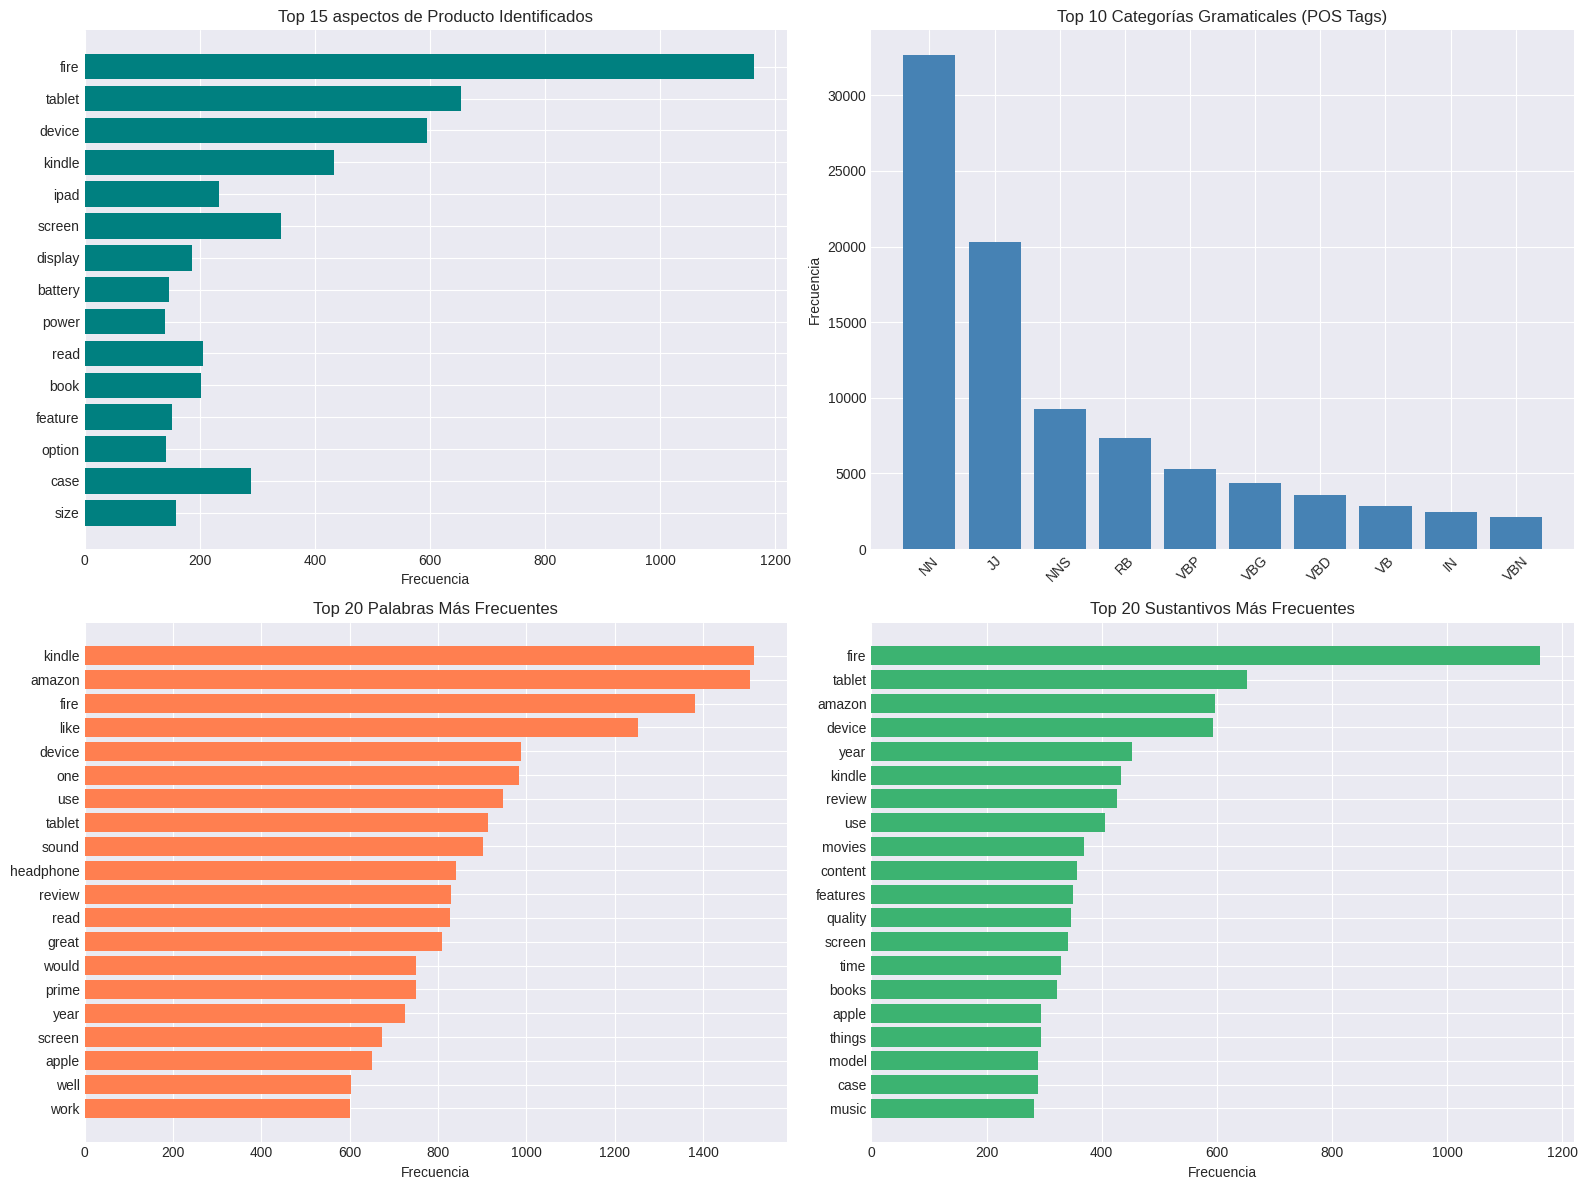


Visualización de resumen guardada: resumen_analisis_pln.png


In [18]:
# ===========================================================================
# 19. RESUMEN Y VISUALIZACIÓN FINAL
# ===========================================================================
print("\n" + "="*80)
print("RESUMEN DEL ANÁLISIS DE PLN")
print("="*80)

summary_stats = {
    'Total de reseñas procesadas': len(df_clean),
    'Total de palabras únicas (filtradas)': len(word_freq),
    'Total de palabras (filtradas)': len(all_words_filtered),
    'Total de sustantivos únicos (filtrados)': len(noun_freq),
    'Total de sustantivos (filtrados)': len(all_nouns_filtered),
    'Aspectos identificados': len(FINAL_ASPECTS),
    'Longitud promedio (caracteres)': df_clean['review_length'].mean(),
    'Palabras promedio por reseña': df_clean['word_count'].mean(),
}

print("\nESTADÍSTICAS GENERALES:\n")
for stat, value in summary_stats.items():
  if isinstance(value, float):
    print(f"    • {stat:40s}: {value:,.1f}")
  else:
    print(f"    • {stat:40s}: {value:,}")

# Creamos las visualizaciones para el resumen
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top aspectos
top_aspects_plot = [(asp, aspect_scores[asp]) for asp in FINAL_ASPECTS[:15]]
aspects, freqs = zip(*top_aspects_plot)
axes[0, 0].barh(range(len(aspects)), freqs, color='teal')
axes[0, 0].set_yticks(range(len(aspects)))
axes[0, 0].set_yticklabels(aspects)
axes[0, 0].set_xlabel('Frecuencia')
axes[0, 0].set_title('Top 15 aspectos de Producto Identificados')
axes[0, 0].invert_yaxis()

# 2. Distribución de POS tags
if pos_counter:
  top_pos = pos_counter.most_common(10)
  pos_labels, pos_counts = zip(*top_pos)
  axes[0, 1].bar(range(len(pos_labels)), pos_counts, color='steelblue')
  axes[0, 1].set_xticks(range(len(pos_labels)))
  axes[0, 1].set_xticklabels(pos_labels, rotation=45)
  axes[0, 1].set_ylabel('Frecuencia')
  axes[0, 1].set_title('Top 10 Categorías Gramaticales (POS Tags)')

# 3. Palabras más comunes
top_20_words = word_freq.most_common(20)
words_plot, counts_plot = zip(*top_20_words)
axes[1, 0].barh(range(len(words_plot)), counts_plot, color='coral')
axes[1, 0].set_yticks(range(len(words_plot)))
axes[1, 0].set_yticklabels(words_plot)
axes[1, 0].set_xlabel('Frecuencia')
axes[1, 0].set_title('Top 20 Palabras Más Frecuentes')
axes[1, 0].invert_yaxis()

# 4. Sustantivos más comunes
top_20_nouns = noun_freq.most_common(20)
nouns_plot, noun_counts_plot = zip(*top_20_nouns)
axes[1, 1].barh(range(len(nouns_plot)), noun_counts_plot, color='mediumseagreen')
axes[1, 1].set_yticks(range(len(nouns_plot)))
axes[1, 1].set_yticklabels(nouns_plot)
axes[1, 1].set_xlabel('Frecuencia')
axes[1, 1].set_title('Top 20 Sustantivos Más Frecuentes')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/resumen_analisis_pln.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualización de resumen guardada: resumen_analisis_pln.png")

## Guardar Resultados

### Archivos Generados

Por la configuración de la libreta, los archivos son guardados en la cuenta de Google Drive de uno de los autores:

#### Visualizaciones (PNG, 300 DPI):
1. `distribucion_longitudes.png` - Histograma de longitud
2. `palabras_mas_frecuentes.png` - Top 20 palabras
3. `sustantivos_mas_frecuentes.png` - Top 25 sustantivos
4. `wordcloud_sustantivos.png` - Nube de palabras
5. `resumen_analisis_pln.png` - Dashboard integrado

#### Datos Procesados
6. `reviews_processed_nlp.csv` - Dataset limpio con:
    - `text_cleaned`: Texto procesado
    - `tokens_lemmatized`: Palabras lematizadas
    - `review_length`: Longitud en caracteres
    - `word_count`: Número de palabras

#### Reportes de Texto
7. `aspectos_finales.txt` - Lista de aspectos con:
    - Frecuencias
    - Categorización
    - Justificación completa

8. `nlp_statistics.txt` - Estadísticas completas:
    - Métricas generadas
    - Top 30 palabras más frecuentes
    - Top 30 sustantivos más frecuentes




In [19]:
# ============================================================================
# 20. GUARDAR RESULTADOS
# ============================================================================
print("\n" + "="*80)
print("GUARDANDO RESULTADOS")
print("="*80)

# Guardamos el DataFrame procesado
output_file = '/content/drive/MyDrive/reviews_processed_nlp.csv'
df_output = df_clean[['text_cleaned', 'tokens_lemmatized', 'review_length', 'word_count']].copy()
df_output.to_csv(output_file, index=False)
print(f"\n✓ Dataset procesado guardado: reviews_processed_nlp.csv")

# Guardamos estadísticas
with open('/content/drive/MyDrive/nlp_statistics.txt', 'w') as f:
  f.write("ESTADÍSTICAS DEL ANÁLISIS DE PLN\n")
  f.write("=" * 70 + "\n\n")

  for stat, value in summary_stats.items():
    if isinstance(value, float):
      f.write(f"{stat:40s}: {value:,.1f}\n")
    else:
      f.write(f"{stat:40s}: {value:,}\n")

  f.write("\n" + "=" * 70 + "\n")
  f.write("\nTOP 30 PALABRAS MÁS FRECUENTES:\n\n")
  for i, (word, count) in enumerate(word_freq.most_common(30), 1):
    f.write(f"{i:2d}. {noun:25s}: {count:6,}\n")

  f.write("\n" + "=" * 70 + "\n")
  f.write("\nTOP 30 SUSTANTIVOS MÁS FRECUENTES:\n\n")
  for i, (noun, count) in enumerate(noun_freq.most_common(30), 1):
    f.write(f"{i:2d}. {noun:25s}: {count:6,}\n")

  print("Estadísticas guardadas: nlp_statistics.txt")

  print("\n" + "="*80)
  print("ANÁLISIS DE PLN COMPLETADO EXITOSAMENTE")
  print("="*80)


GUARDANDO RESULTADOS

✓ Dataset procesado guardado: reviews_processed_nlp.csv
Estadísticas guardadas: nlp_statistics.txt

ANÁLISIS DE PLN COMPLETADO EXITOSAMENTE
